In [208]:
! pip install mediapipe==0.10.9



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [209]:
! wget -O pose_landmarker.task -q https://storage.googleapis.com/mediapipe-models/pose_landmarker/pose_landmarker_heavy/float16/1/pose_landmarker_heavy.task

We take the draw landmarks function from the MediaPipe tutorial: https://colab.research.google.com/github/googlesamples/mediapipe/blob/main/examples/pose_landmarker/python/%5BMediaPipe_Python_Tasks%5D_Pose_Landmarker.ipynb#scrollTo=OMjuVQiDYJKF

In [1]:
import mediapipe as mp
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np
from mediapipe.python.solutions.drawing_utils import DrawingSpec
import math
import cv2 as cv


good_landmarks = [12,14,16,24]
good_connections = frozenset({(0,1),(0,3),(1,2)})
custom_style={0:DrawingSpec(color=(0, 255, 0), thickness=20, circle_radius=10),
              1:DrawingSpec(color=(0, 255, 0), thickness=20, circle_radius=10),
              2:DrawingSpec(color=(0, 255, 0), thickness=20, circle_radius=10),
              3:DrawingSpec(color=(0, 255, 255), thickness=20, circle_radius=10)}



def calcular_angulo(A, B, C):
    # Calcular vectores AB y BC
    vector_AB = [B[0] - A[0], B[1] - A[1]]
    vector_BC = [C[0] - B[0], C[1] - B[1]]
    
    # Calcular el dot product de los vectores AB y BC
    producto_punto = vector_AB[0] * vector_BC[0] + vector_AB[1] * vector_BC[1]
    
    # Calcular la magnitud de los vectores AB y BC
    magnitud_AB = math.sqrt(vector_AB[0]**2 + vector_AB[1]**2)
    magnitud_BC = math.sqrt(vector_BC[0]**2 + vector_BC[1]**2)
    
    # Calcular el coseno del ángulo entre los vectores AB y BC
    coseno_angulo = producto_punto / (magnitud_AB * magnitud_BC)
    
    # Calcular el ángulo en radianes usando el arcocoseno
    angulo_radianes = math.acos(-coseno_angulo)
    
    # Convertir el ángulo de radianes a grados
    angulo_grados = math.degrees(angulo_radianes)
    
    return angulo_grados


def draw_landmarks_on_image(rgb_image, detection_result):
  posiciones_landmarks=[]
  pose_landmarks_list = detection_result.pose_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected poses to visualize.
  for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]

    # Draw the pose landmarks.
    pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()

    for i in range(len(pose_landmarks)):
      if i in good_landmarks:
        landmark = pose_landmarks[i]
        pos_land = [landmark.x,landmark.y,landmark.z]
        posiciones_landmarks.append(pos_land)
        pose_landmarks_proto.landmark.extend([
          landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z)
        ])

    
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      pose_landmarks_proto,
      connections = good_connections, 
      landmark_drawing_spec = custom_style
      )
  return annotated_image, posiciones_landmarks


def put_label(text,image):
  posicion = (200, 200)
  fuente = cv.FONT_HERSHEY_DUPLEX
  tamano_fuente = 5
  color = (255, 0, 0) 
  (ancho_texto, alto_texto), _ = cv.getTextSize(text, fuente, 5, 2)

  posicion_y = 200
  punto1 = (50, posicion_y+50)
  punto2 = (50 + ancho_texto, posicion_y - alto_texto-50)
  cv.rectangle(image, punto1, punto2, (0, 255, 0), -1)
  cv.putText(image, text, (50, posicion_y), fuente, 5, color, 2)

  return image

def put_warning(image):
  posicion = (500, 500)
  text = 'Do not flex your elbow please!!'
  fuente = cv.FONT_HERSHEY_DUPLEX
  tamano_fuente = 5
  color = (255, 255, 255) 
  (ancho_texto, alto_texto), _ = cv.getTextSize(text, fuente, 3, 2)

  posicion_y = 500
  punto1 = (50, posicion_y+50)
  punto2 = (50 + ancho_texto, posicion_y - alto_texto-50)
  cv.rectangle(image, punto1, punto2, (255, 0, 0), -1)
  cv.putText(image, text, (50, posicion_y), fuente, 3, color, 2)

  return image

def put_warning_position(image):
  posicion = (500, 500)
  text = 'Please get in front of the camera!!!'
  fuente = cv.FONT_HERSHEY_DUPLEX
  tamano_fuente = 5
  color = (255, 255, 255) 
  (ancho_texto, alto_texto), _ = cv.getTextSize(text, fuente, 3, 2)

  posicion_y = 500
  punto1 = (50, posicion_y+50)
  punto2 = (50 + ancho_texto, posicion_y - alto_texto-50)
  cv.rectangle(image, punto1, punto2, (255, 0, 0), -1)
  cv.putText(image, text, (50, posicion_y), fuente, 3, color, 2)

  return image

We are going to load the images with which we are going to work, but like I have a  Mac that has some problems when I use the cv.imshow because python crashes, so I have to do some changes to show the images using .plt:

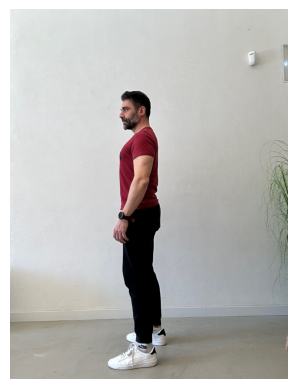

['./task_c/TEST- 4.jpeg']


In [2]:
import cv2 as cv
import os
import matplotlib.pyplot as plt 

path_imgs_task_a = './task_a'
path_imgs_task_b = './task_b'
path_imgs_task_c = './task_c'

imgs_a=[]
imgs_a_names=[]
imgs_b=[]
imgs_b_names=[]
imgs_c=[]
imgs_c_names=[]

files_names = os.listdir(path_imgs_task_a)
for image in files_names:
    name = path_imgs_task_a+'/'+image
    img = cv.imread(name)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    imgs_a.append(img)
    imgs_a_names.append(name)

files_names = os.listdir(path_imgs_task_b)
for image in files_names:
    name= path_imgs_task_b+'/'+image
    img = cv.imread(name)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    imgs_b.append(img)
    imgs_b_names.append(name)

files_names_c = os.listdir(path_imgs_task_c)
for image in files_names_c:
    name = path_imgs_task_c+'/'+image
    img = cv.imread(name)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    imgs_c.append(img)
    imgs_c_names.append(name)

plt.imshow(imgs_c[0])
plt.axis('off')  
plt.show()

print(imgs_c_names)

# Task A

I0000 00:00:1712301632.501137       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 76.3), renderer: Apple M1
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


El ángulo que forma al realizar la abducción es: 123.75020426123275


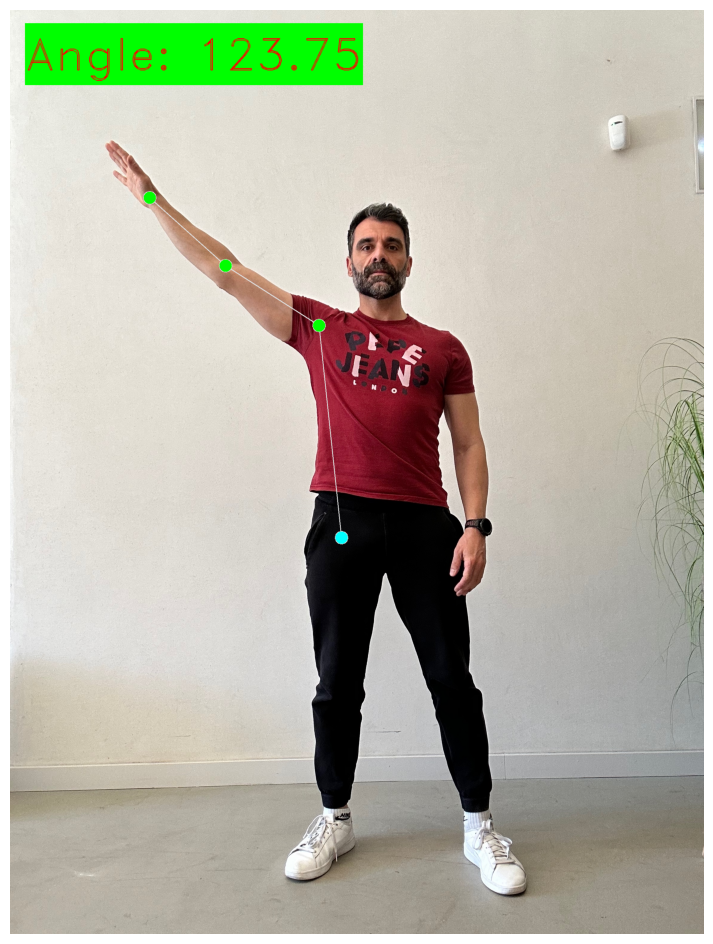

I0000 00:00:1712301633.372356       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 76.3), renderer: Apple M1


El ángulo que forma al realizar la abducción es: 43.77311327803988


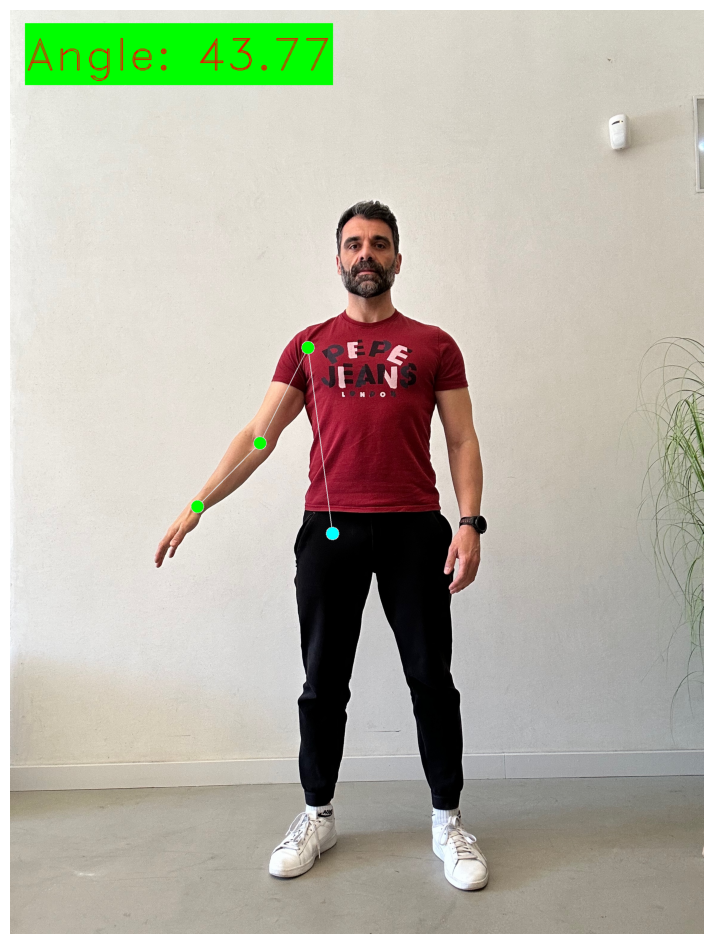

I0000 00:00:1712301634.127996       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 76.3), renderer: Apple M1


El ángulo que forma al realizar la abducción es: 90.01013669645359


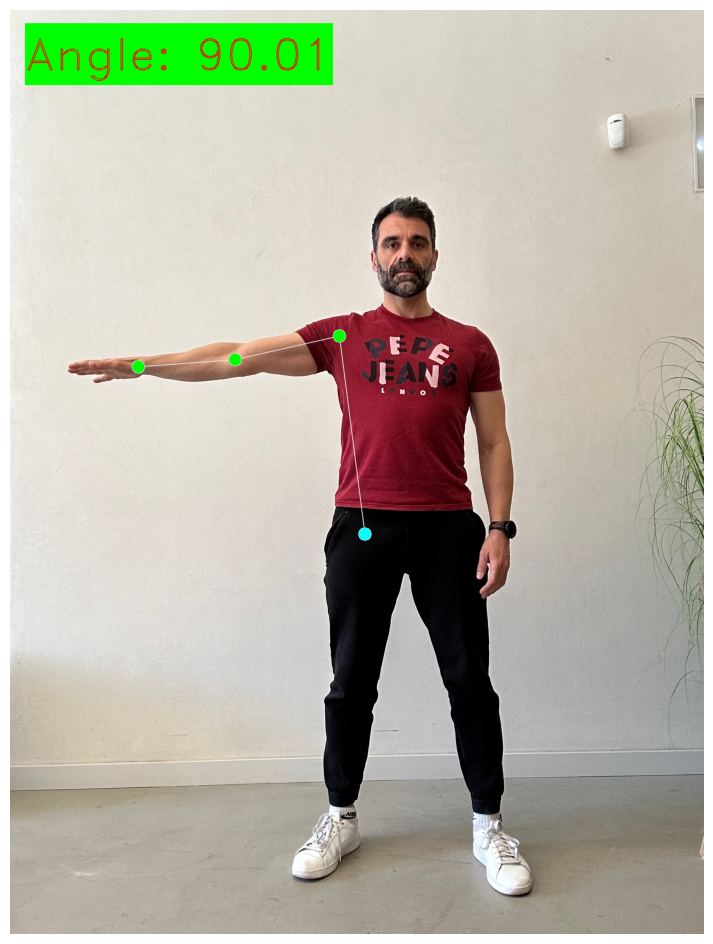

I0000 00:00:1712301634.842282       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 76.3), renderer: Apple M1


El ángulo que forma al realizar la abducción es: 26.00638831371039


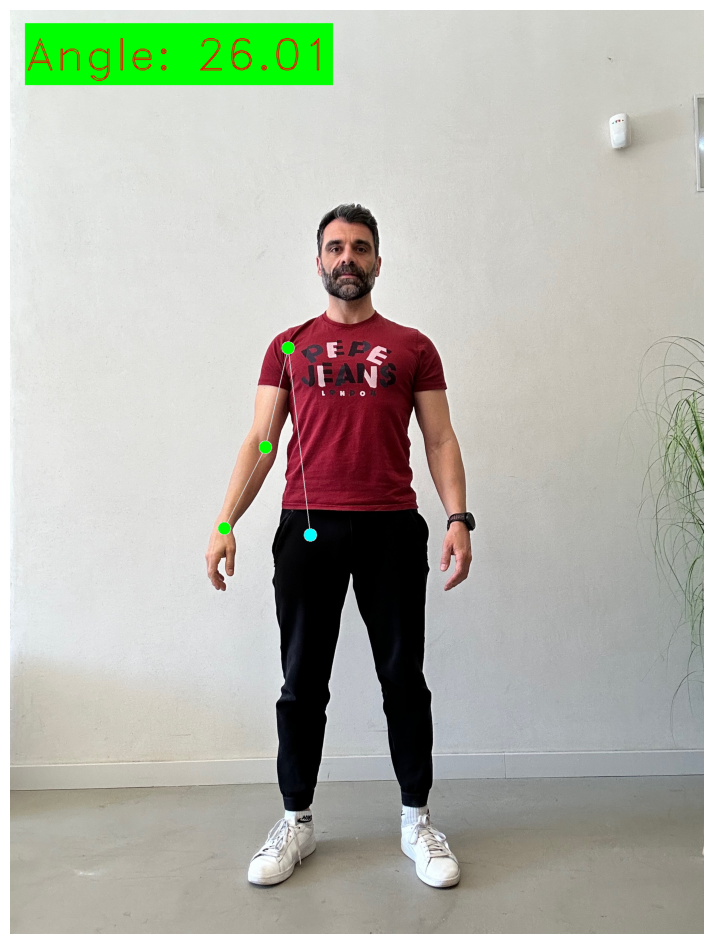

In [3]:
#STEP 1: imports
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

for img in imgs_a:
    # STEP 2: Create an PoseLandmarker object.
    base_options = python.BaseOptions(model_asset_path='./pose_landmarker.task')
    options = vision.PoseLandmarkerOptions(
    base_options=base_options,
    output_segmentation_masks=True)
    detector = vision.PoseLandmarker.create_from_options(options)

    # STEP 3: Load the input image.
    mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=img)
    # STEP 4: Detect pose landmarks from the input image.
    detection_result = detector.detect(mp_image)

    # STEP 5: Process the detection result. In this case, visualize it.
    annotated_image, landmarks_positions = draw_landmarks_on_image(mp_image.numpy_view(), detection_result)

    shoulder= landmarks_positions[0]
    elbow = landmarks_positions[1]
    hip = landmarks_positions[3]

    #STEP 6: Calculate the angle.
    angle = calcular_angulo(elbow, shoulder, hip)

    #STEP 7: Put the label 
    texto = 'Angle: '+str(round(angle,2))

    annotated_image = put_label(texto,annotated_image)
   
    #STEP 8: Show results
    print('El ángulo que forma al realizar la abducción es: '+str(angle))

    plt.figure(figsize=(20,12))
    plt.imshow(annotated_image)
    plt.axis('off')  
    plt.show()

# Task B

I0000 00:00:1712301641.734041       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 76.3), renderer: Apple M1


El ángulo que forma en el codo es: 48.32983126246816
El ángulo que forma al realizar la abducción es: 108.06395630189618


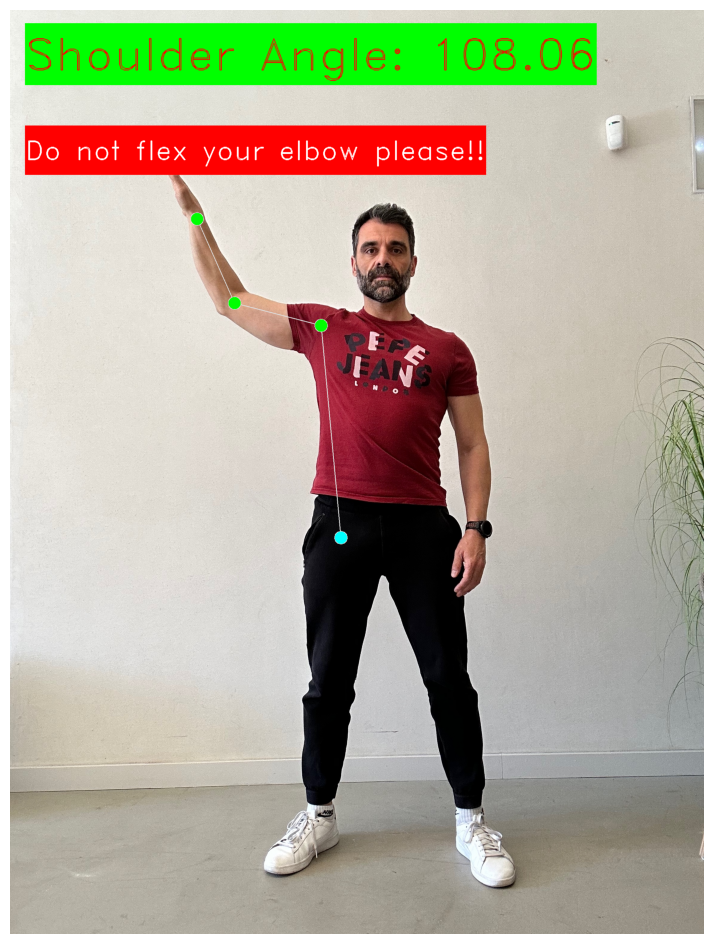

In [4]:

def check_elbow_flexion(img):
    # STEP 2: Create an PoseLandmarker object.
    base_options = python.BaseOptions(model_asset_path='./pose_landmarker.task')
    options = vision.PoseLandmarkerOptions(
    base_options=base_options,
    output_segmentation_masks=True)
    detector = vision.PoseLandmarker.create_from_options(options)

    # STEP 3: Load the input image.
    mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=img)
    # STEP 4: Detect pose landmarks from the input image.
    detection_result = detector.detect(mp_image)

    # STEP 5: Process the detection result. In this case, visualize it.
    annotated_image, landmarks_positions = draw_landmarks_on_image(mp_image.numpy_view(), detection_result)

    shoulder= landmarks_positions[0]
    elbow = landmarks_positions[1]
    wrist = landmarks_positions[2]
    hip = landmarks_positions[3]

    #STEP 6: Calculate the angle.
    shoulder_angle = calcular_angulo(elbow, shoulder, hip)

    #STEP 7: Put the label 
    texto = 'Shoulder Angle: '+str(round(shoulder_angle,2))

    annotated_image = put_label(texto,annotated_image)

    #STEP 8: Check elbow flexion
    elbow_angle = calcular_angulo(wrist, elbow, shoulder)
    elbow_angle= 180 - elbow_angle
    print('El ángulo que forma en el codo es: '+str(elbow_angle))
    #STEP 9: Show results
    print('El ángulo que forma al realizar la abducción es: '+str(shoulder_angle))

   
    if elbow_angle > 10:
        put_warning(annotated_image)
   
    plt.figure(figsize=(20,12))
    plt.imshow(annotated_image)
    plt.axis('off')  
    plt.show()

check_elbow_flexion(imgs_b[0])

I0000 00:00:1712303207.437268       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 76.3), renderer: Apple M1


El ángulo que forma en el codo es: 8.455161002704841
El ángulo que forma al realizar la abducción es: 123.75020426123275


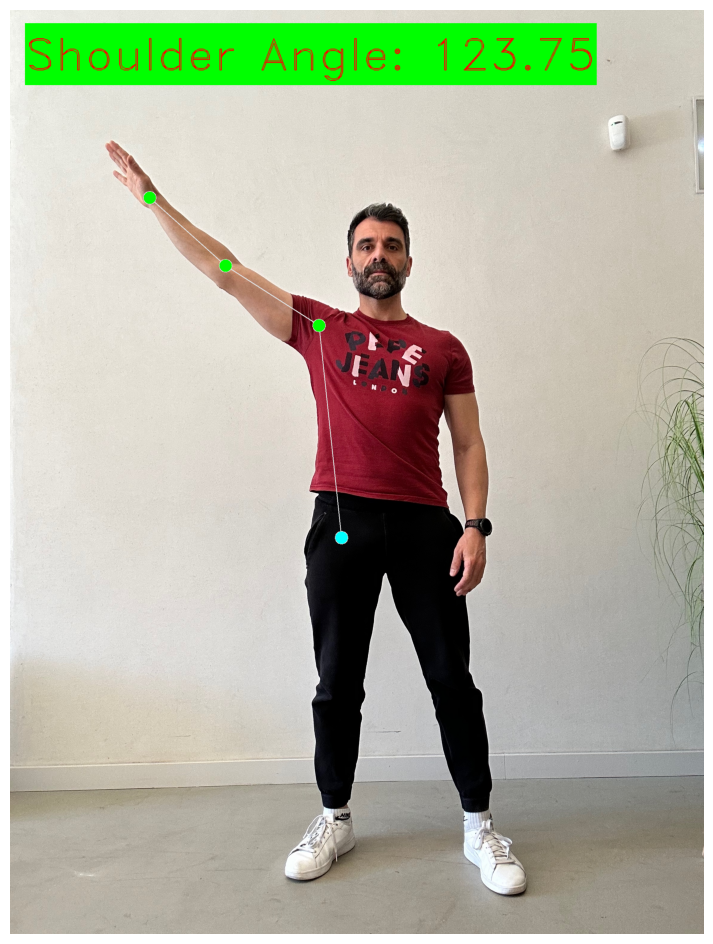

In [11]:
check_elbow_flexion(imgs_a[0])

I think that the check is reliable, but there are some problems in some images because the angle is higher than 10 degrees. To solve that we can increase a bit the threshold because due to the human anatomy is difficult to mantain less than 10 degrees when you are moving your arm.

# Task C

I0000 00:00:1712301650.626074       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 76.3), renderer: Apple M1


El ángulo que forma en el codo es: 21.105732451724123
El ángulo que forma al realizar la abducción es: 3.695943825618625


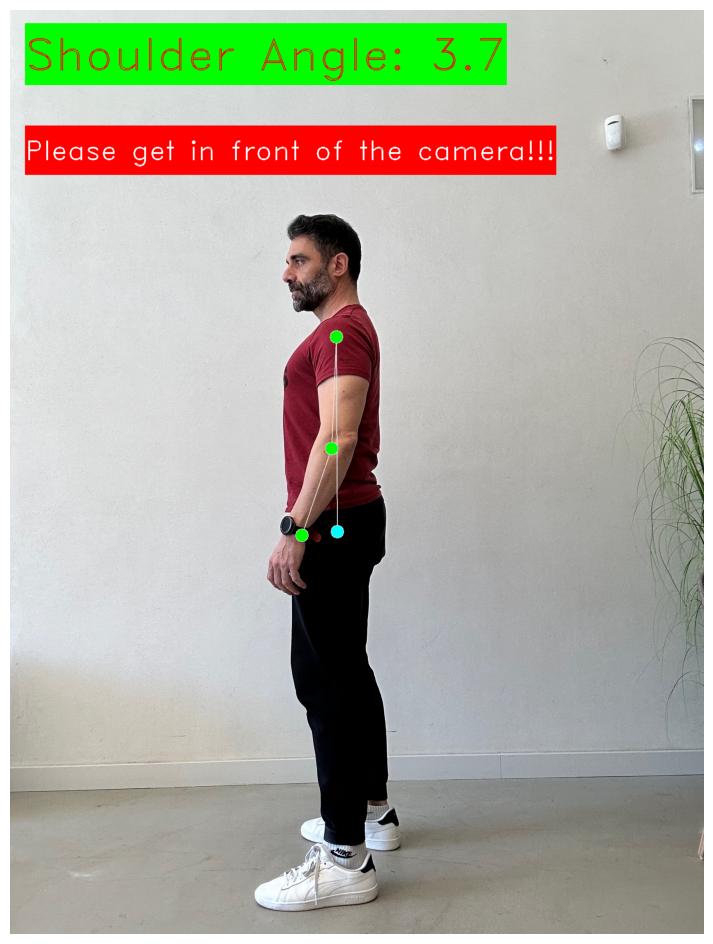

In [6]:
def check_standing(img):
    # STEP 2: Create an PoseLandmarker object.
    base_options = python.BaseOptions(model_asset_path='./pose_landmarker.task')
    options = vision.PoseLandmarkerOptions(
    base_options=base_options,
    output_segmentation_masks=True)
    detector = vision.PoseLandmarker.create_from_options(options)

    # STEP 3: Load the input image.
    mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=img)
    # STEP 4: Detect pose landmarks from the input image.
    detection_result = detector.detect(mp_image)

    # STEP 5: Process the detection result. In this case, visualize it.
    annotated_image, landmarks_positions = draw_landmarks_on_image(mp_image.numpy_view(), detection_result)

    shoulder= landmarks_positions[0]
    elbow = landmarks_positions[1]
    wrist = landmarks_positions[2]
    hip = landmarks_positions[3]

    #STEP 6: Calculate the angle.
    shoulder_angle = calcular_angulo(elbow, shoulder, hip)

    #STEP 7: Put the label 
    texto = 'Shoulder Angle: '+str(round(shoulder_angle,2))

    annotated_image = put_label(texto,annotated_image)

    #STEP 8: Check elbow flexion
    elbow_angle = calcular_angulo(wrist, elbow, shoulder)
    elbow_angle= 180 - elbow_angle
    print('El ángulo que forma en el codo es: '+str(elbow_angle))

    #STEP 9: Check if the person is standing in front of the camera or not:
    if abs(shoulder[0]-hip[0])< 0.01:
        put_warning_position(annotated_image)

    elif elbow_angle > 10:
        put_warning(annotated_image)

    #STEP 10: Show results
    print('El ángulo que forma al realizar la abducción es: '+str(shoulder_angle))

   
  
   
    plt.figure(figsize=(20,12))
    plt.imshow(annotated_image)
    plt.axis('off')  
    plt.show()

check_standing(imgs_c[0])

To make this check I have employed the body anatomy, because when the body is in front of the camera the hip and the shoulder are not in the same vertical line due to the triangular shape of people's torso. However, when we are on the side, both the hip and the shoulder are aligned on the same line parallel to the vertical axis of the camera.

I0000 00:00:1712301655.575041       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 76.3), renderer: Apple M1


El ángulo que forma en el codo es: 8.455161002704841
El ángulo que forma al realizar la abducción es: 123.75020426123275


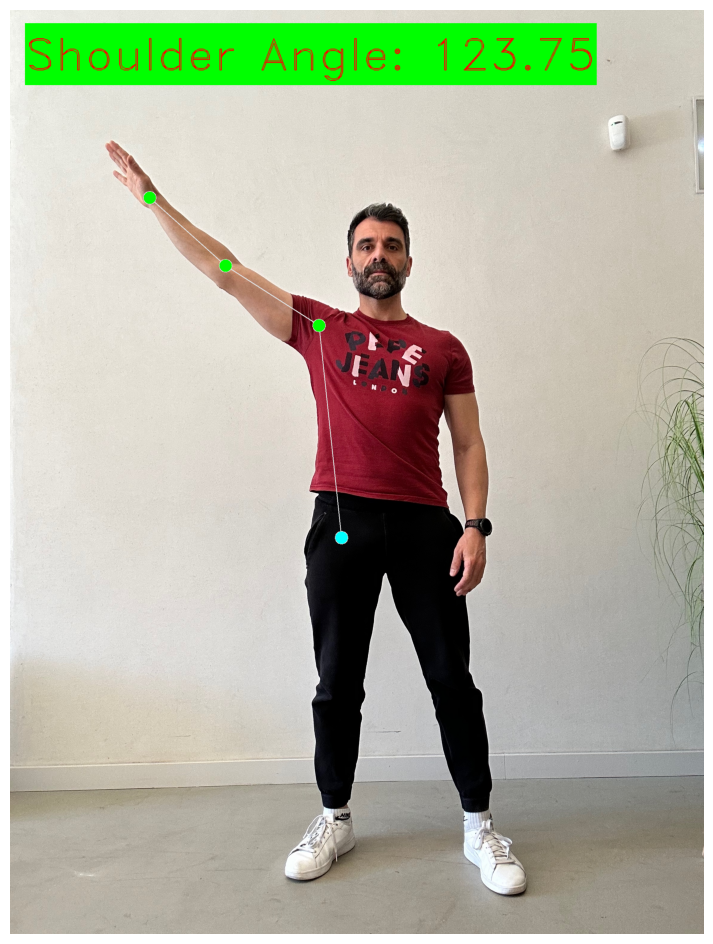

In [7]:
check_standing(imgs_a[0])

I0000 00:00:1712302079.015302       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 76.3), renderer: Apple M1


El ángulo que forma en el codo es: 48.32983126246816
El ángulo que forma al realizar la abducción es: 108.06395630189618


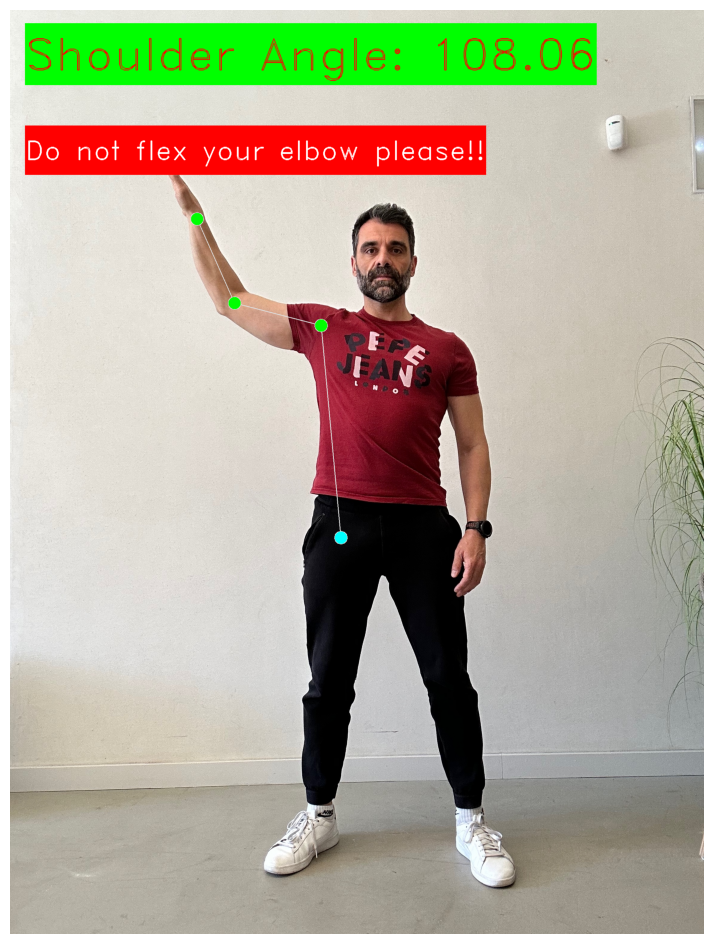

In [8]:
check_standing(imgs_b[0])

# Open question


To work with video or camera stream instead of images I haven't had much time to investigate in depth but I have seen that mediapipe has an option when you define the poseLandmarkOptions in which you can choose if you are working with images, video or streaming. But the difference between them should not be very large since a video is a concatenation of images. We would only have to continually refresh the image we are working with.

To test these functions with other images I have included an image of me:

I0000 00:00:1712302490.889299       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 76.3), renderer: Apple M1


El ángulo que forma en el codo es: 4.7017165392273625
El ángulo que forma al realizar la abducción es: 158.00572701538266


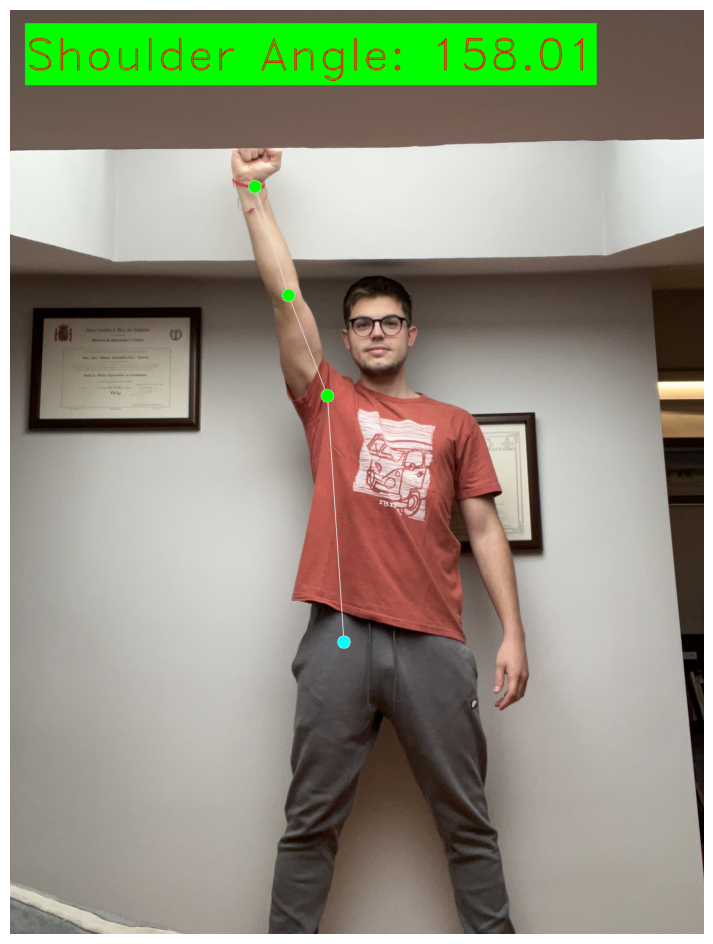

In [9]:
own_img = './own/own_img.JPG'
img = cv.imread(own_img)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
check_standing(img)